# 二手车汽车价格预测

### 项目概述：
#### 数据集介绍：
本项目使用的数据集包含了多个与二手车交易相关的特征，每条记录代表一次二手车交易。

数据集中的主要字段包括：

- SaleID：交易ID，为每笔交易的唯一编码。
- name：汽车交易名称，已脱敏。
- regDate：汽车注册日期，例如20160101表示2016年01月01日。
- model：车型编码，已脱敏。
- brand：汽车品牌，已脱敏。
- bodyType：车身类型，包括豪华轿车、微型车等多种类型。
- fuelType：燃油类型，包括汽油、柴油、电动等。
- gearbox：变速箱类型，包括手动和自动。
- power：发动机功率，范围为0至600。
- kilometer：汽车已行驶公里数。
- notRepairedDamage：汽车是否有未修复的损坏。
- regionCode：地区编码，已脱敏。
- seller：销售方类型，个体或非个体。
- offerType：报价类型。
- creatDate：汽车上线时间，即开始售卖时间。
- price：二手车交易价格，为本次分析的预测目标。
- v系列特征：包含15个匿名特征的v0至v14。



#### 分析方法：
在本项目中，我们采用了数据探索、数据清洗、特征工程和机器学习建模等方法来预测二手车的交易价格。主要步骤包括：

- 数据预处理：包括缺失值处理、异常值处理和数据转换。
- 特征工程：基于数据的特点提取和选择有助于预测任务的特征。
- 建模与评估：使用线性回归、决策树、随机森林和梯度提升回归等多种模型，并对模型进行调优以提高预测准确性。
#### 项目目的：
通过对二手车交易数据的分析，我们旨在构建一个能够准确预测二手车交易价格的模型，为二手车买卖提供参考。该模型可以帮助买家和卖家更好地理解市场动态，做出明智的交易决策。

### 一：数据读取

#### 导入相关的库

In [1]:
## 基础工具
import numpy as np
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import jn
from IPython.display import display, clear_output
import time

warnings.filterwarnings('ignore')
%matplotlib inline

## 模型预测的
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor


from sklearn.model_selection import learning_curve

from sklearn.model_selection import validation_curve


## 参数搜索和评价的
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold,train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score



#### 读取数据


In [2]:
## 通过Pandas对于数据进行读取 (pandas是一个很友好的数据读取函数库)
train_data = pd.read_csv('data/used_car_train_20200313.csv', sep=' ')


### 二：探索性数据分析EDA与可视化
#### 数据探索




基本检查

In [3]:
## 输出数据的大小信息
print('Train data shape:',train_data.shape)

Train data shape: (150000, 31)


In [4]:
#数据探索
## 通过.head() 简要浏览读取数据的形式
train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [5]:
## 通过 .columns 查看列名
train_data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14'],
      dtype='object')

In [6]:
## 通过 .describe() 可以查看数值特征列的一些统计信息
train_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [7]:
# 查看训练数据集的基本信息
train_info = train_data.info()


# 分别查看数值型和类别型特征的统计描述
numerical_cols = train_data.select_dtypes(exclude=['object']).columns
categorical_cols = train_data.select_dtypes(include=['object']).columns

numerical_description = train_data[numerical_cols].describe()
categorical_description = train_data[categorical_cols].describe()

train_info, numerical_description, categorical_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

(None,
               SaleID           name       regDate          model  \
 count  150000.000000  150000.000000  1.500000e+05  149999.000000   
 mean    74999.500000   68349.172873  2.003417e+07      47.129021   
 std     43301.414527   61103.875095  5.364988e+04      49.536040   
 min         0.000000       0.000000  1.991000e+07       0.000000   
 25%     37499.750000   11156.000000  1.999091e+07      10.000000   
 50%     74999.500000   51638.000000  2.003091e+07      30.000000   
 75%    112499.250000  118841.250000  2.007111e+07      66.000000   
 max    149999.000000  196812.000000  2.015121e+07     247.000000   
 
                brand       bodyType       fuelType        gearbox  \
 count  150000.000000  145494.000000  141320.000000  144019.000000   
 mean        8.052733       1.792369       0.375842       0.224943   
 std         7.864956       1.760640       0.548677       0.417546   
 min         0.000000       0.000000       0.000000       0.000000   
 25%         1.00000

数据可视化：
目标变量（价格）分布：

价格呈现出右偏分布，表明大多数车辆的价格较低，而少数车辆的价格非常高。


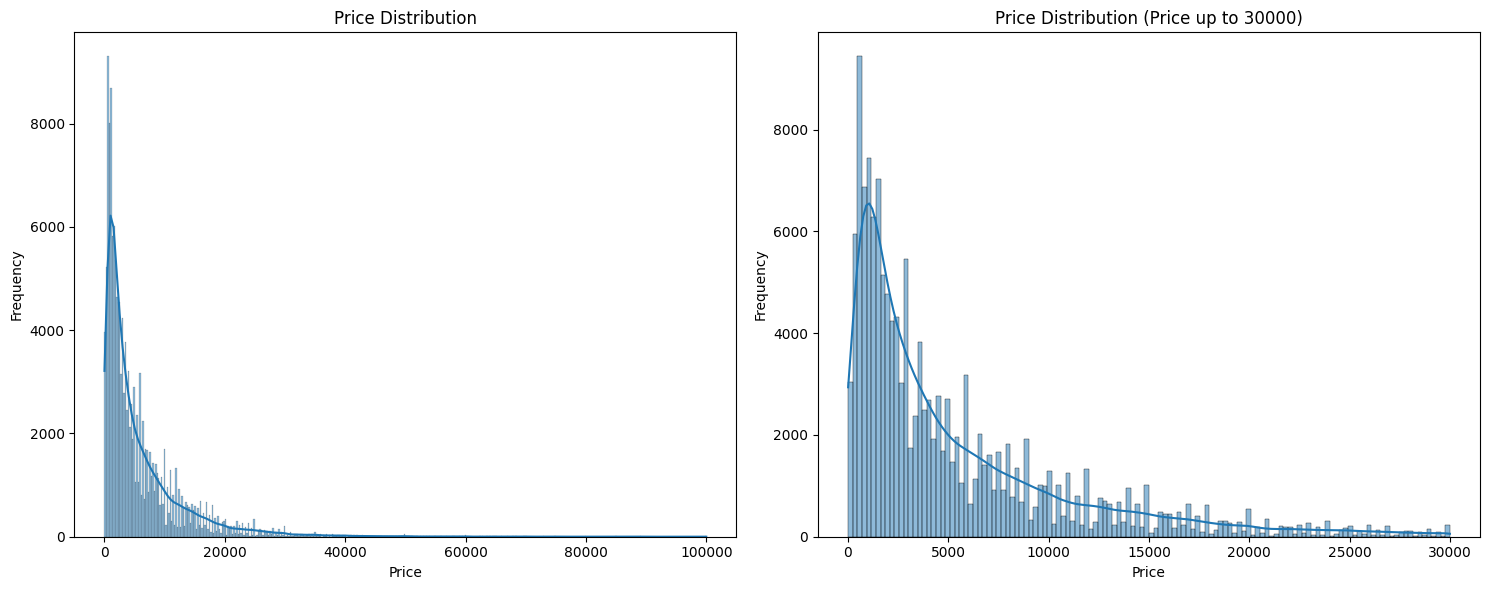

In [12]:
# 探索性数据分析（EDA）

# 分析目标变量'price'的分布

# 创建一个包含两个子图的图表
plt.figure(figsize=(15, 6))

# 第一个子图：保持原样
plt.subplot(1, 2, 1)  # 1行2列的第一个
sns.histplot(train_data['price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

# 第二个子图：X轴取值范围修改为0到60000
plt.subplot(1, 2, 2)  # 1行2列的第二个
sns.histplot(train_data[train_data['price'] <= 30000]['price'], kde=True)
plt.title('Price Distribution (Price up to 30000)')
plt.xlabel('Price')
plt.ylabel('Frequency')

# 显示图表
plt.tight_layout()  # 调整子图布局
plt.show()




#### 分析特征与目标变量之间的关系

特征与价格的关系：

- power（发动机功率）似乎与价格正相关，即功率更大的车辆通常价格更高。
- kilometer（行驶公里数）与价格呈现负相关，行驶公里数越多，车辆价格越低。
- vehicle_age（车龄）与价格也呈现负相关，车龄越长，价格越低。
- model（车型编码）与价格的关系不是很明显，可能因为model是一个匿名特征。
- v_0, v_2, v_3, v_8, v_12 这五个匿名特征与价格的相关性都超过了+-0.5。说明这些特征与价格之间存在强相关性


#### 特征间的相关性：

相关性矩阵显示了这些特征与价格之间的相关性大小。



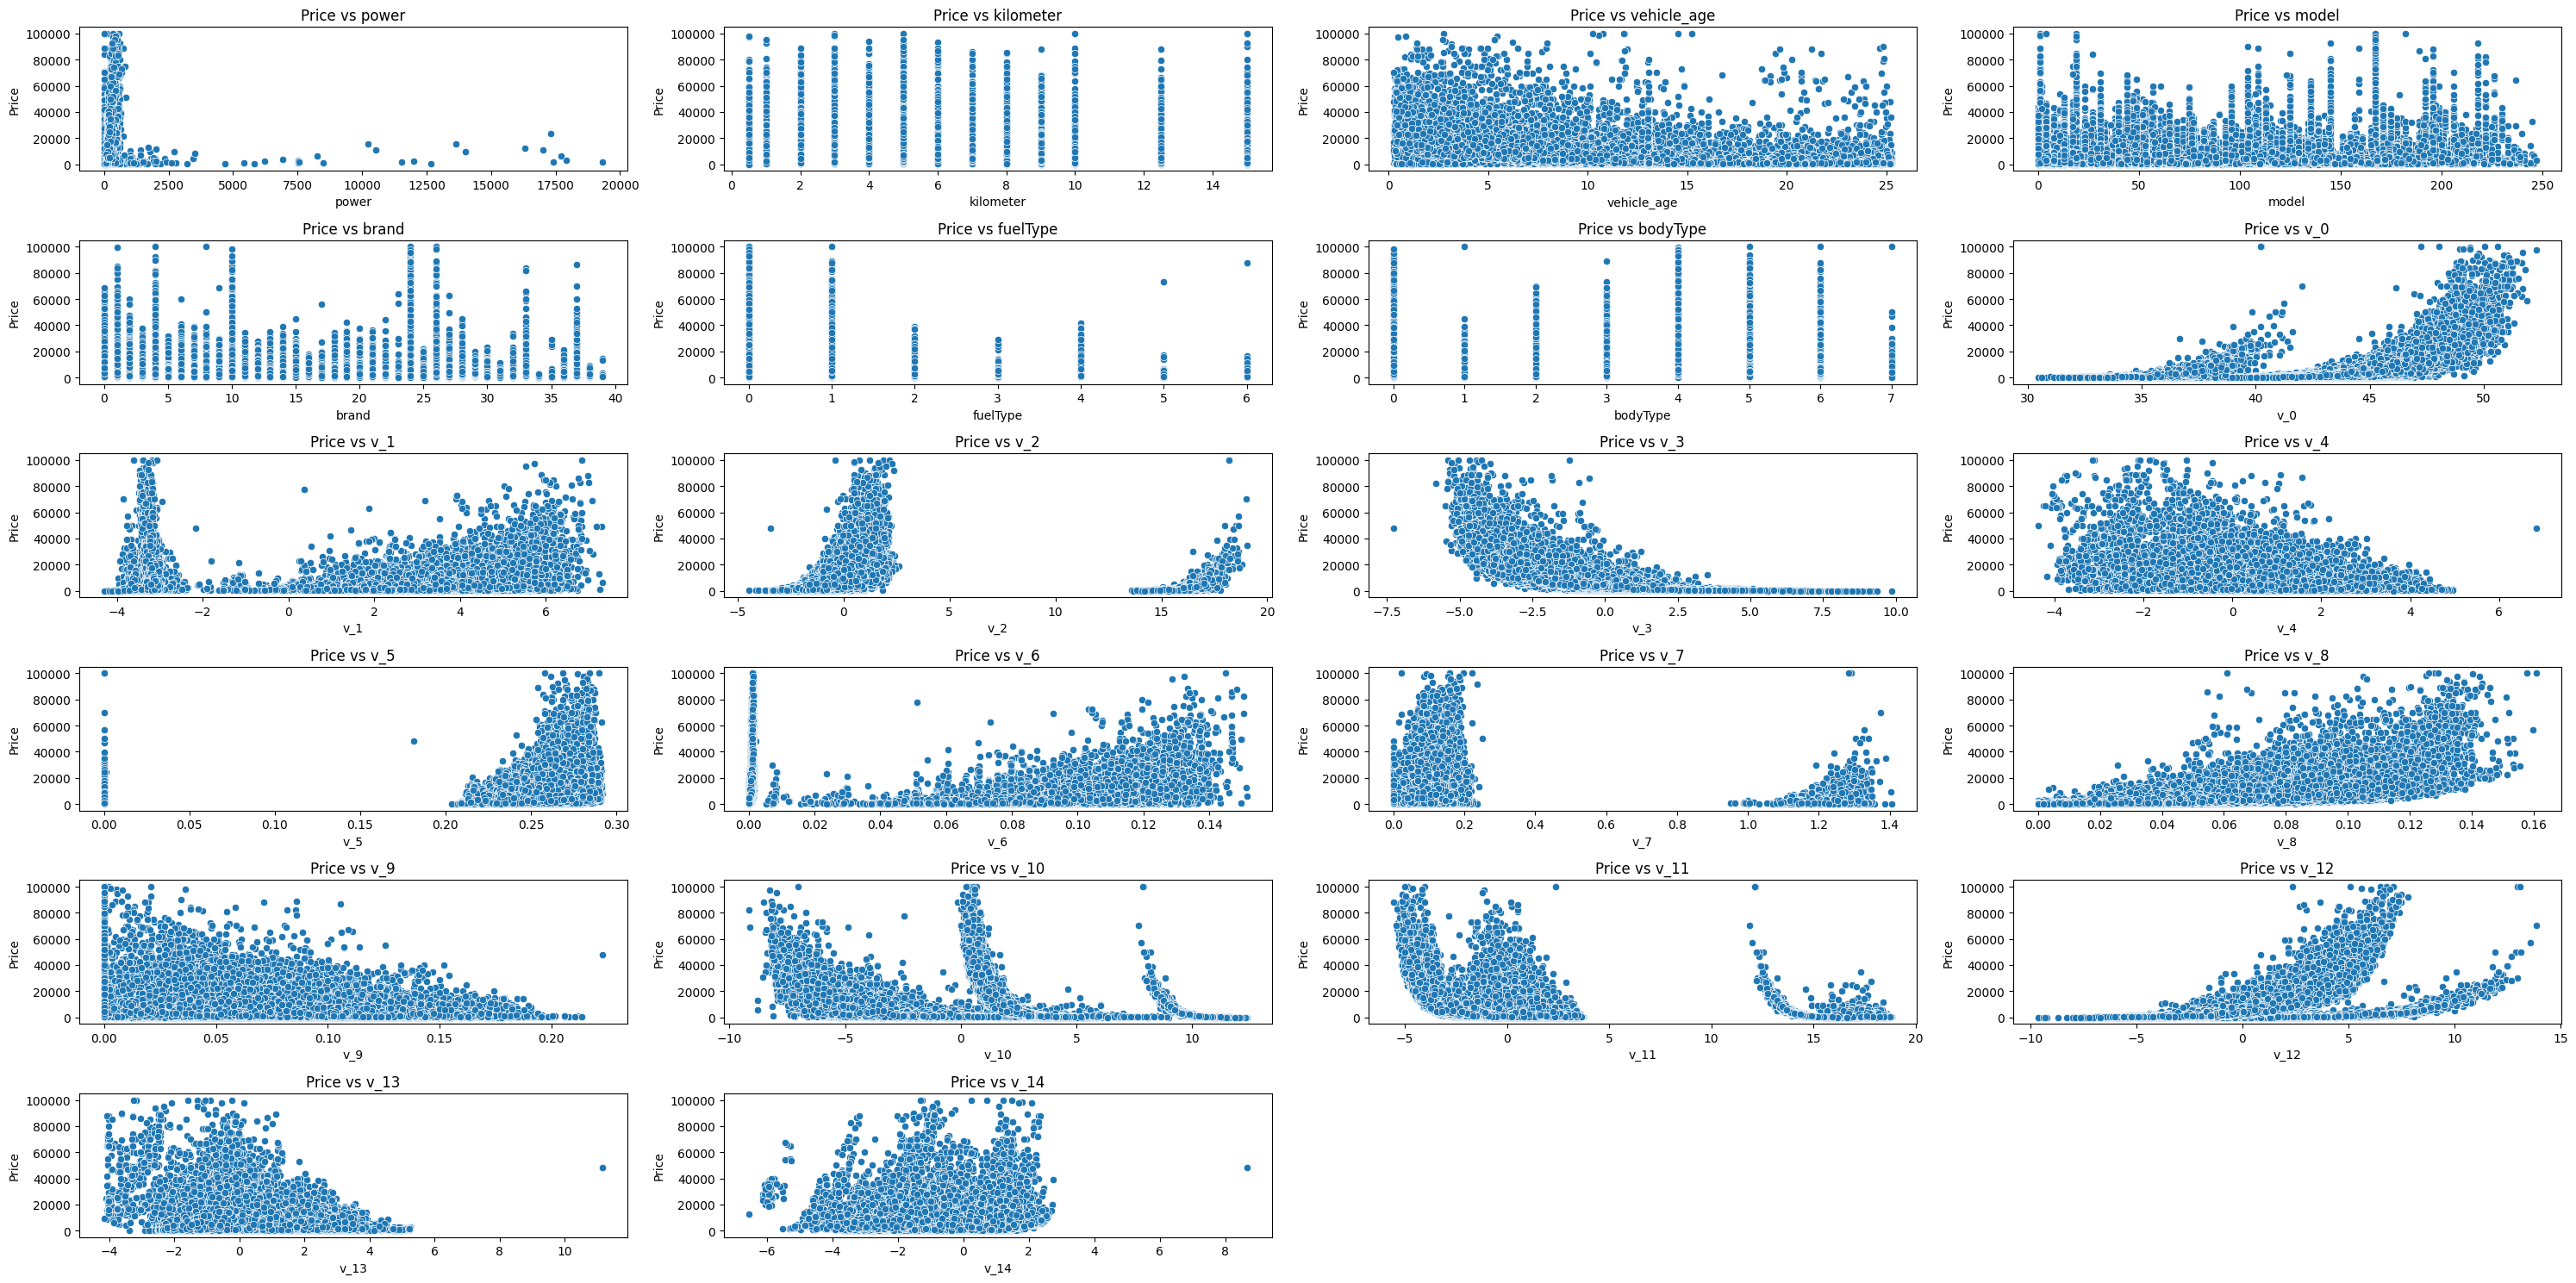

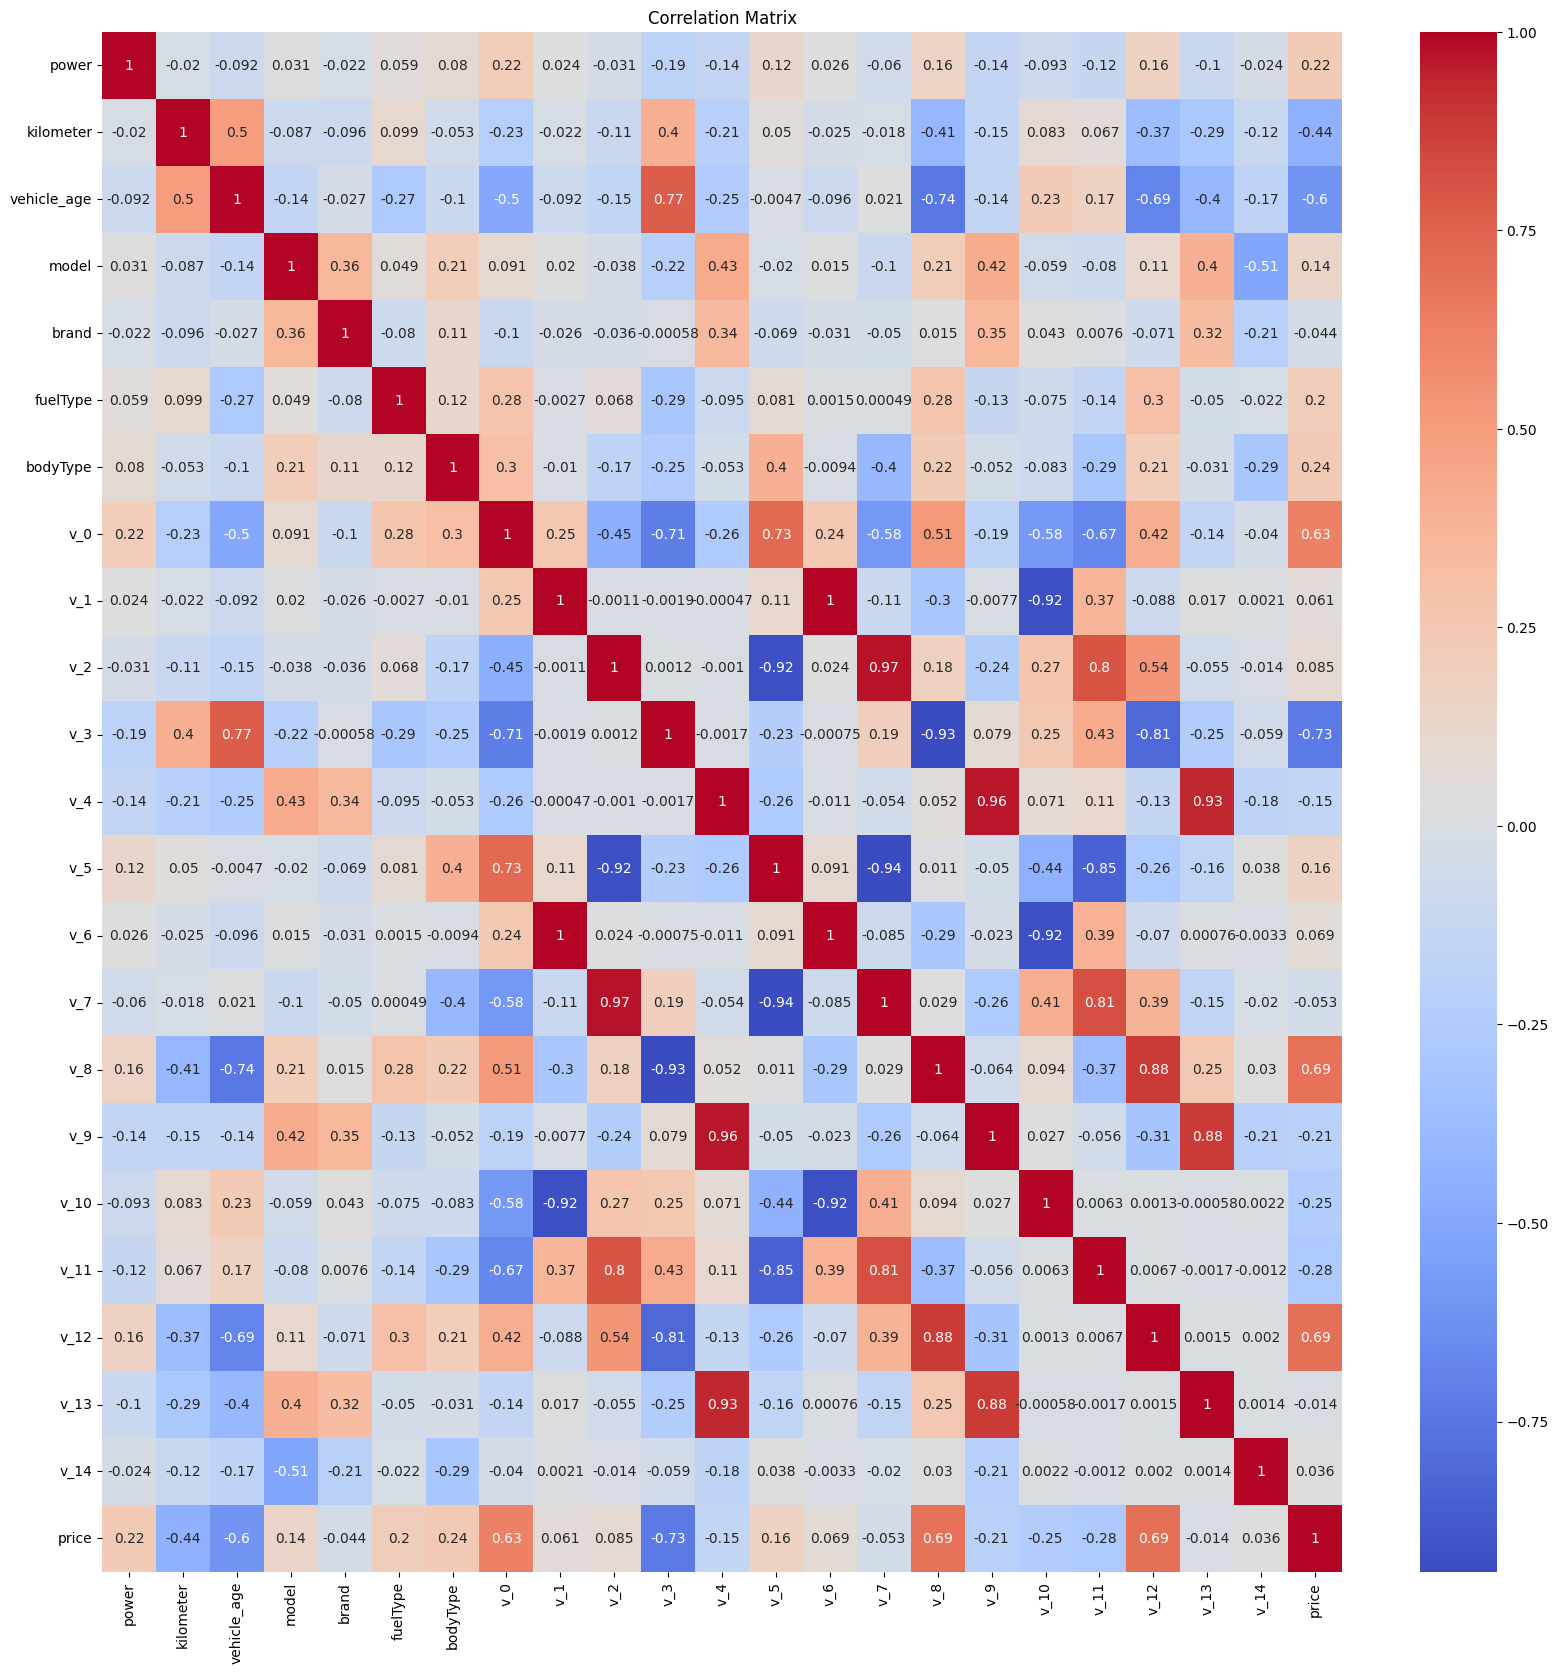

In [14]:
# 将不符合格式的日期视为缺失值

def handle_invalid_dates(df, column):
    """
    处理不符合日期格式的数据，将其视为缺失值并用众数填充
    """
    try:
        df[column] = pd.to_datetime(df[column], format='%Y%m%d', errors='coerce')
    except ValueError:
        pass
    # 用众数填充缺失值
    mode = df[column].mode()[0]
    df[column].fillna(mode, inplace=True)

handle_invalid_dates(train_data, 'regDate')
handle_invalid_dates(train_data, 'creatDate')


# 由于车龄没有现成的数据，需要通过regDate和creatDate字段计算
train_data['vehicle_age'] = (train_data['creatDate'] - train_data['regDate']).dt.days / 365

# 由于特征数量较多，我们这里仅展示部分特征的关系
sample_features = ['power', 'kilometer', 'vehicle_age', 'model','brand','fuelType','bodyType','v_0','v_1','v_2','v_3','v_4','v_5','v_6','v_7','v_8','v_9','v_10','v_11','v_12','v_13','v_14']
plt.figure(figsize=(30, 15))

for i, feature in enumerate(sample_features, 1):
    plt.subplot(6, 4, i)
    sns.scatterplot(x=train_data[feature], y=train_data['price'])
    plt.title(f'Price vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()


# 分析特征间的相关性
corr_matrix = train_data[sample_features + ['price']].corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### 三：数据清洗

In [15]:
# 缺失值处理
for eve in train_data:
    print("列名：\t%s\t, 有\t%d\t个缺失数据；"%(eve,list(train_data[eve]).count("NaN")))

列名：	SaleID	, 有	0	个缺失数据；
列名：	name	, 有	0	个缺失数据；
列名：	regDate	, 有	0	个缺失数据；
列名：	model	, 有	0	个缺失数据；
列名：	brand	, 有	0	个缺失数据；
列名：	bodyType	, 有	0	个缺失数据；
列名：	fuelType	, 有	0	个缺失数据；
列名：	gearbox	, 有	0	个缺失数据；
列名：	power	, 有	0	个缺失数据；
列名：	kilometer	, 有	0	个缺失数据；
列名：	notRepairedDamage	, 有	0	个缺失数据；
列名：	regionCode	, 有	0	个缺失数据；
列名：	seller	, 有	0	个缺失数据；
列名：	offerType	, 有	0	个缺失数据；
列名：	creatDate	, 有	0	个缺失数据；
列名：	price	, 有	0	个缺失数据；
列名：	v_0	, 有	0	个缺失数据；
列名：	v_1	, 有	0	个缺失数据；
列名：	v_2	, 有	0	个缺失数据；
列名：	v_3	, 有	0	个缺失数据；
列名：	v_4	, 有	0	个缺失数据；
列名：	v_5	, 有	0	个缺失数据；
列名：	v_6	, 有	0	个缺失数据；
列名：	v_7	, 有	0	个缺失数据；
列名：	v_8	, 有	0	个缺失数据；
列名：	v_9	, 有	0	个缺失数据；
列名：	v_10	, 有	0	个缺失数据；
列名：	v_11	, 有	0	个缺失数据；
列名：	v_12	, 有	0	个缺失数据；
列名：	v_13	, 有	0	个缺失数据；
列名：	v_14	, 有	0	个缺失数据；
列名：	vehicle_age	, 有	0	个缺失数据；


异常值处理

- 我们需要检查数据集中是否存在异常值，并对其进行处理。

In [16]:
# 以'power'字段为例，处理异常值
# 根据数据集的字段说明，'power'字段大于600的值视为异常值，并将其限制在600以内
train_data['power'] = train_data['power'].apply(lambda x: min(x, 600))


# 替换"-"为NaN值
train_data.replace('-', np.nan, inplace=True)
# 删除包含NaN值的行
train_data.dropna(inplace=True)

In [17]:

# 再次检查处理后的数据
train_data.head()


,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,vehicle_age
0,0,736,2004-04-02,30.0,6,1.0,0.0,0.0,60,12.5,...,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,12.013699
2,2,14874,2004-04-03,115.0,15,1.0,0.0,0.0,163,12.5,...,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,12.005479
3,3,71865,1996-09-08,109.0,10,0.0,0.0,1.0,193,15.0,...,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,19.520548
4,4,111080,2012-01-03,110.0,5,1.0,0.0,0.0,68,5.0,...,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,4.194521
5,5,137642,2009-06-02,24.0,10,0.0,1.0,0.0,109,10.0,...,0.000518,0.119838,0.090922,0.048769,1.885526,-2.721943,2.457660,-0.286973,0.206573,6.800000


### 四：特征工程
对类别型特征进行编码，例如使用独热编码或标签编码。

In [18]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# 独热编码
encoder = OneHotEncoder()
categorical_columns = ['brand', 'bodyType', 'fuelType', 'gearbox']
encoded_categorical = encoder.fit_transform(train_data[categorical_columns]).toarray()
encoded_columns = encoder.get_feature_names_out(categorical_columns)
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoded_columns)

# 合并编码后的特征
train_data = train_data.reset_index(drop=True)
train_data_encoded = pd.concat([train_data, encoded_categorical_df], axis=1)
train_data_encoded.drop(categorical_columns + ['regDate', 'creatDate'], axis=1, inplace=True)

### 五：数据分割


In [19]:
# 数据规范化
# 定义需要规范化的数值特征列表
numeric_features = ['power', 'kilometer', 'vehicle_age','v_0','v_2','v_3','v_8','v_12']
# 创建标准化器对象
scaler = StandardScaler()
# 使用标准化器对训练数据中的数值特征进行规范化处理
train_data_encoded[numeric_features] = scaler.fit_transform(train_data_encoded[numeric_features])
print(train_data_encoded.columns)

Index(['SaleID', 'name', 'model', 'power', 'kilometer', 'notRepairedDamage',
       'regionCode', 'seller', 'offerType', 'price', 'v_0', 'v_1', 'v_2',
       'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14', 'vehicle_age', 'brand_0', 'brand_1', 'brand_2',
       'brand_3', 'brand_4', 'brand_5', 'brand_6', 'brand_7', 'brand_8',
       'brand_9', 'brand_10', 'brand_11', 'brand_12', 'brand_13', 'brand_14',
       'brand_15', 'brand_16', 'brand_17', 'brand_18', 'brand_19', 'brand_20',
       'brand_21', 'brand_22', 'brand_23', 'brand_24', 'brand_25', 'brand_26',
       'brand_27', 'brand_28', 'brand_29', 'brand_30', 'brand_31', 'brand_32',
       'brand_33', 'brand_34', 'brand_35', 'brand_36', 'brand_37', 'brand_38',
       'brand_39', 'bodyType_0.0', 'bodyType_1.0', 'bodyType_2.0',
       'bodyType_3.0', 'bodyType_4.0', 'bodyType_5.0', 'bodyType_6.0',
       'bodyType_7.0', 'fuelType_0.0', 'fuelType_1.0', 'fuelType_2.0',
       'fuelType_3.0',

In [20]:
# 划分数据集
X = train_data_encoded.drop('price', axis=1)
y = train_data_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

### 六：建模分析

#### 模型1：线性回归模型


In [22]:
%%time
# 模型训练与评估
# 线性回归

#打印运行的时间 


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
lr_r2 = r2_score(y_test, lr_y_pred)
# 输出R² score
print("线性回归的 R² score:", lr_r2)



线性回归的 R² score: 0.7523722410524176
CPU times: total: 984 ms
Wall time: 790 ms


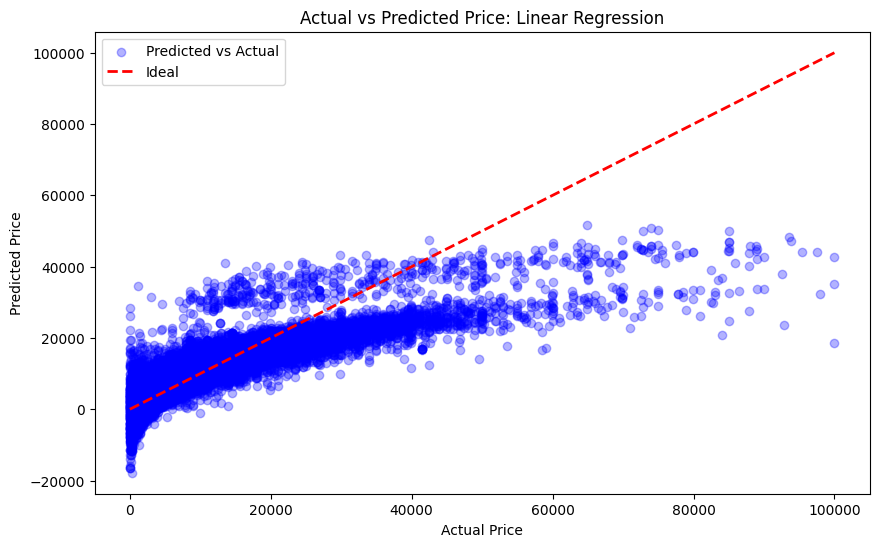

In [27]:

# y_test = ... (测试集的实际价格)
# lr_y_pred = ... (线性回归模型的预测价格)

# 创建散点图来比较预测值和实际值
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_y_pred, alpha=0.3, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Ideal')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price: Linear Regression')
plt.legend()
plt.show()




#### 线性回归模型优化

选择带有正则化的线性回归模型调优后，结果无差异

In [24]:
%%time
#线性回归模型优化



# 定义一组可能的alpha值
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,10000]

# 创建一个带有正则化的线性回归模型
ridge_model = Ridge()

# 使用GridSearchCV来搜索最佳的alpha值
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# 输出最佳的alpha值和对应的R²分数
print("最佳的alpha值:", grid_search.best_params_['alpha'])
print("最佳的R² score:", grid_search.best_score_)

# 使用最佳的模型进行预测
best_ridge_model = grid_search.best_estimator_
y_pred = best_ridge_model.predict(X_test)
lr_r2_optimized = r2_score(y_test, y_pred)
print("调优后的回归的 R² score为", lr_r2_optimized)


最佳的alpha值: 0.0001
最佳的R² score: 0.7503589806795012
调优后的回归的 R² score为 0.7508847722652123
CPU times: total: 10.1 s
Wall time: 9.93 s


#### 模型2：随机森林模型

In [24]:
%%time
# 随机森林回归
rf_model = RandomForestRegressor(random_state=42,n_jobs=-1)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_y_pred)
print("随机森林的R² score为:", rf_r2)


随机森林的R² score为: 0.9543851007341896
CPU times: total: 6min 58s
Wall time: 58.9 s


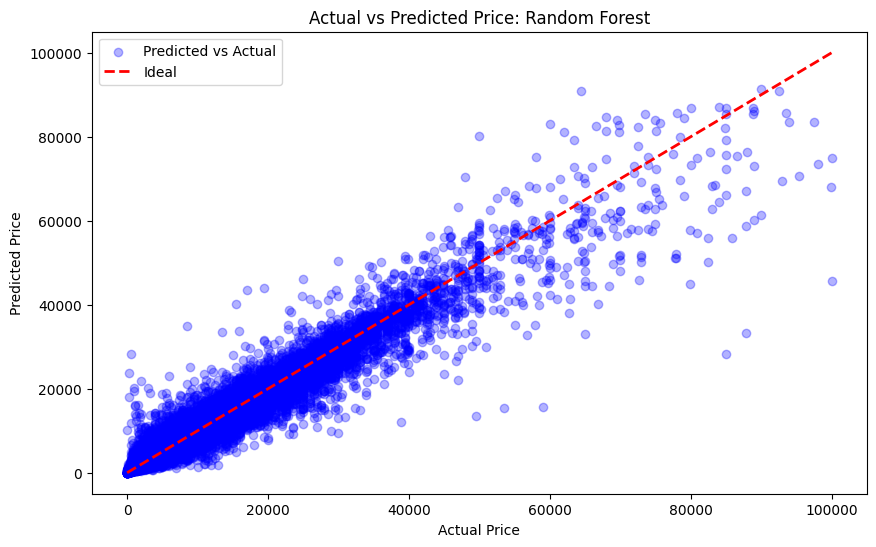

In [28]:

# y_test = ... (测试集的实际价格)
# rf_y_pred = ... (随机森林模型的预测价格)

# 创建散点图来比较预测值和实际值
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_y_pred, alpha=0.3, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Ideal')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price: Random Forest')
plt.legend()
plt.show()



随机森林模型调优
调优随机森林模型通常涉及到调整其多个超参数，以优化模型的性能。下面是一些常见的调优策略和超参数：

- n_estimators：树的数量。增加树的数量可以提高模型的稳定性和性能，但也会增加计算成本。
- max_features：在分裂节点时考虑的最大特征数。它决定了用于构建每棵树的特征的随机子集的大小。
- max_depth：树的最大深度。限制树的深度可以防止过拟合。
- min_samples_split：分裂内部节点所需的最小样本数。
- min_samples_leaf：叶子节点所需的最小样本数。
- bootstrap：是否在构建树时使用放回抽样。



由于在这个二手车价格预测问题中，随机森林回归的R2 Score分数为0.954,已经达到了很好的效果，因此我们可以认为模型已经很好地拟合了数据。所以不需要进行调优。


#### 模型3：决策树回归模型

In [29]:
%%time
# 决策树回归

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
dt_r2 = r2_score(y_test, dt_y_pred)
print("决策树回归的 R² score为:", dt_r2)


决策树回归的 R² score为: 0.9040926133926404
CPU times: total: 3.27 s
Wall time: 3.32 s


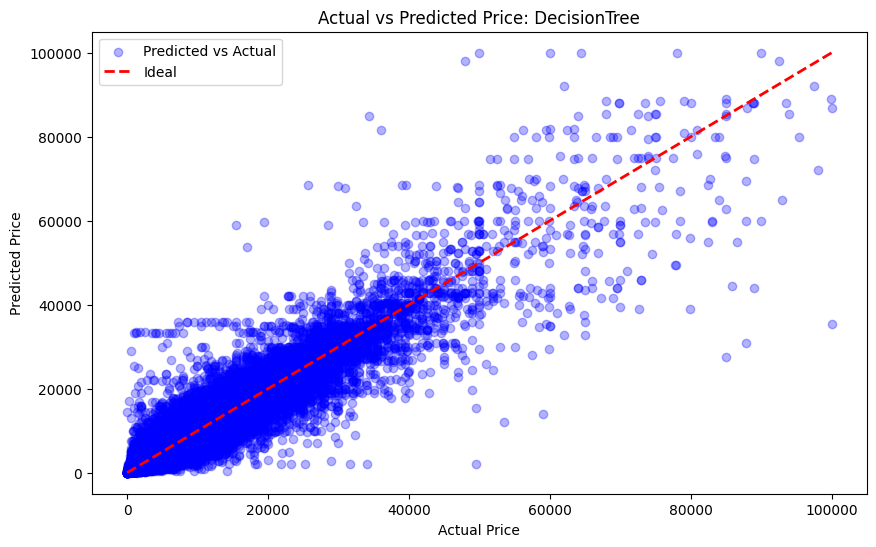

In [31]:

# y_test = ... (测试集的实际价格)
# dt_y_pred = ... (决策树模型的预测价格)

# 创建散点图来比较预测值和实际值
plt.figure(figsize=(10, 6))
plt.scatter(y_test, dt_y_pred, alpha=0.3, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Ideal')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price: DecisionTree')
plt.legend()
plt.show()



#### 决策树回归模型调优

- 决策树的深度是一个重要的超参数，它决定了树的复杂度和拟合能力。选择合适的决策树深度取决于你的数据集和具体问题，没有一种通用的深度适用于所有情况
    - 观察学习曲线和验证曲线：绘制学习曲线和验证曲线，以观察模型的性能随深度变化的情况。通过观察曲线，你可以找到一个在训练集和验证集之间取得平衡的深度值，避免欠拟合和过拟合。
    - 使用剪枝技术：在构建决策树时，可以使用剪枝技术来控制树的深度。剪枝可以在构建树的过程中修剪掉一些分支，以限制树的深度。常见的剪枝参数包括最大深度（max_depth）、最小叶子节点样本数（min_samples_leaf）、最小分裂节点样本数（min_samples_split）等。

- 总结：决策树的深度选择应该是一个基于数据和问题的实际调优过程。过深的树可能容易过拟合，而过浅的树可能欠拟合。因此，建议采用上述方法来确定最合适的决策树深度，以达到最佳的模型性能。
经过调优，我们得到了最优的决策树模型：
    - 最佳的超参数组合: {'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 10}
    - 调优后的决策树回归的 R² score为: 0.9218207975522805，提升了2个百分点

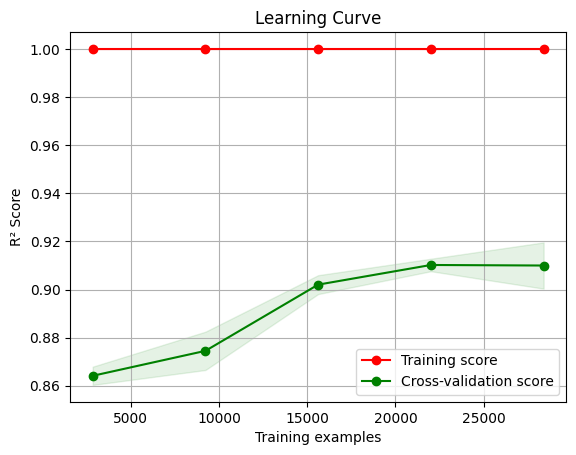

In [29]:


# 定义绘制学习曲线的函数
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("R² Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='r2')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# 使用示例
plot_learning_curve(dt_model, "Learning Curve", X_train, y_train, cv=5)
plt.show()


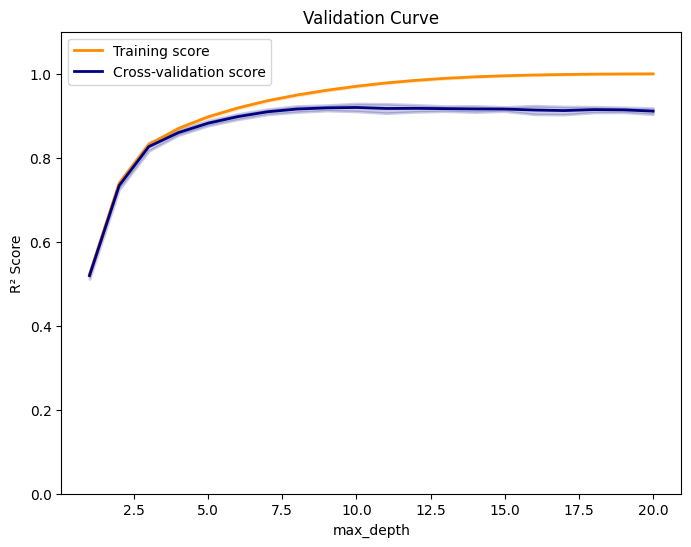

CPU times: total: 2min 24s
Wall time: 2min 24s


In [30]:
%%time

# 定义绘制验证曲线的函数
def plot_validation_curve(estimator, X, y, param_name, param_range, scoring="r2", cv=5):
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(8, 6))
    plt.title("Validation Curve")
    plt.xlabel(param_name)
    plt.ylabel("R² Score")
    plt.ylim(0.0, 1.1)
    lw = 2

    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()

# 使用示例
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
plot_validation_curve(dt_model, X_train, y_train, param_name="max_depth", param_range=param_range)


In [31]:
%%time
#决策树回归模型调优


# 定义要搜索的超参数范围
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 创建一个带有决策树回归器的GridSearchCV对象
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='r2')

# 使用GridSearchCV来搜索最佳超参数组合
grid_search.fit(X_train, y_train)

# 输出最佳的超参数组合
print("最佳的超参数组合:", grid_search.best_params_)

# 使用最佳的模型进行预测
best_dt_model = grid_search.best_estimator_
y_pred = best_dt_model.predict(X_test)
dt_r2_optimized = r2_score(y_test, y_pred)
print("调优后的决策树回归的 R² score为:", dt_r2_optimized)


最佳的超参数组合: {'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 10}
调优后的决策树回归的 R² score为: 0.9218207975522805
CPU times: total: 18min 42s
Wall time: 18min 46s


#### 模型4：梯度提升回归模型

In [32]:
%%time
# 梯度提升回归
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_r2 = r2_score(y_test, gb_y_pred)

print("梯度提升回归的 R² score为:", gb_r2)

梯度提升回归的 R² score为: 0.9497520037527096
CPU times: total: 54.7 s
Wall time: 54.9 s


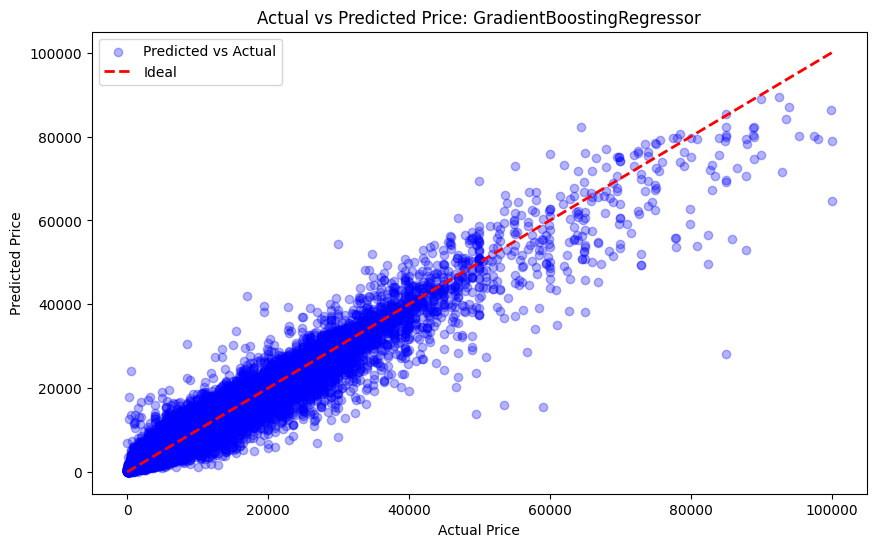

In [33]:

# y_test = ... (测试集的实际价格)
# gb_y_pred = ... (决策树模型的预测价格)

# 创建散点图来比较预测值和实际值
plt.figure(figsize=(10, 6))
plt.scatter(y_test, gb_y_pred, alpha=0.3, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Ideal')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price: GradientBoostingRegressor')
plt.legend()
plt.show()

#### 梯度提升回归模型调优

梯度提升回归（Gradient Boosting Regressor）是一种强大的回归模型，通过调优其超参数可以进一步提高模型的性能。以下是一些常见的调优策略和可调整的关键超参数：

1. 学习率 (learning_rate):
学习率决定了每棵树对最终结果的贡献程度。较小的学习率通常意味着需要更多的树来训练模型，但可以提高模型的泛化能力。
2. 树的数量 (n_estimators):
n_estimators 表示要构建的树的数量。更多的树可以提高模型的性能，但也会增加计算成本和时间。
3. 树的深度 (max_depth):
树的最大深度限制了单棵树的复杂度。较深的树可以捕捉更复杂的模式，但也可能导致过拟合。
4. 最小分割所需样本数 (min_samples_split):
决定了节点分割所需的最小样本数。较大的值可以防止模型学习过于具体的模式，但也可能导致欠拟合。
5. 损失函数 (loss):
选择适合问题类型的损失函数。对于回归问题，常用的损失函数包括 ls（最小二乘误差）、lad（最小绝对偏差）等。
调优方法：
网格搜索（Grid Search）：尝试不同的参数组合，找到最优解。
随机搜索（Randomized Search）：在给定的参数范围内随机选择参数，通常比网格搜索更快。


由于在这个二手车价格预测问题中，梯度回归的R2 Score分数为0.949,已经达到了很好的效果，因此我们可以认为模型已经很好地拟合了数据。所以不需要进行调优。

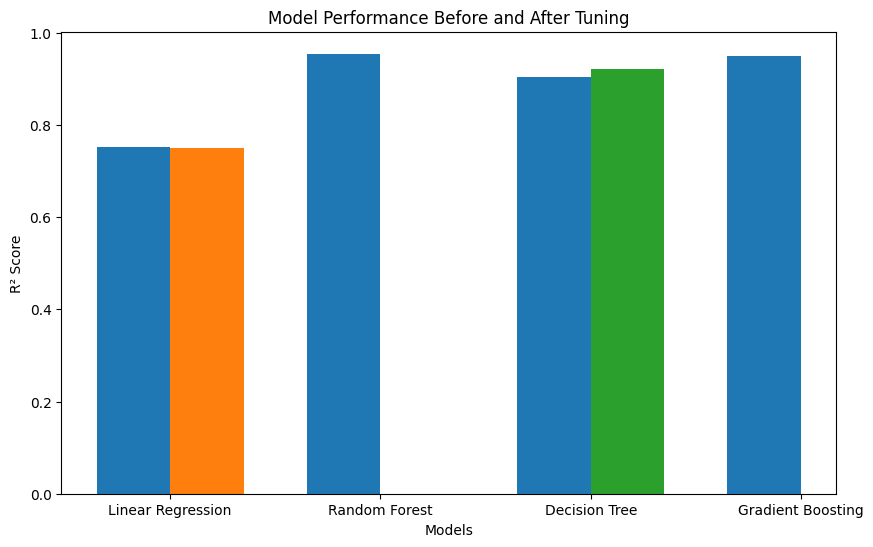

线性回归调优前的R²分数为： 0.7523722377008444
线性回归调优后的R²分数为： 0.7508847722652123
----------------------------------------
随机森林调优前的R²分数为： 0.9543851007341896
随机森林 因为R2分数已经很高，无调优
----------------------------------------
决策树调优前的R²分数为： 0.9040926133926404
决策树调优后的R²分数为： 0.9218207975522805
----------------------------------------
梯度提升树调优前的R²分数为： 0.9497520037527096
梯度提升树 因为R2分数已经很高，无调优


In [48]:
# 假设的模型性能数据（调优前后的R²分数）
# 请根据实际情况替换以下示例数值
model_performance_before = {
    'Linear Regression': lr_r2,
    'Random Forest': rf_r2,
    'Decision Tree': dt_r2,
    'Gradient Boosting': gb_r2
}

model_performance_after = {
    'Linear Regression': lr_r2_optimized,
    # 'Random Forest': 无调优
    'Decision Tree': dt_r2_optimized,
    # 'Gradient Boosting': 无调优
}

# 转换为列表，方便绘图
models = list(model_performance_before.keys())
performance_before = list(model_performance_before.values())
performance_after = list(model_performance_after.values())

# 创建直方图
plt.figure(figsize=(10, 6))


# 设置bar的位置
bar_width = 0.35
index = np.arange(len(model_performance_before))

# 绘制调优前的bar
plt.bar(index, model_performance_before.values(), bar_width, label='Before Tuning')

# 绘制调优后的bar（只对有调优后数据的模型绘制）
for i, model in enumerate(model_performance_before.keys()):
    if model in model_performance_after:
        plt.bar(index[i] + bar_width, model_performance_after[model], bar_width, label='After Tuning' if i == 0 else "")

# 添加标签和标题
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.title('Model Performance Before and After Tuning')
plt.xticks(index + bar_width / 2, model_performance_before.keys())


# 显示图表
plt.show()

print("线性回归调优前的R²分数为：", lr_r2)
print("线性回归调优后的R²分数为：", lr_r2_optimized)

print("----------------------------------------")
print("随机森林调优前的R²分数为：", rf_r2)
print("随机森林 因为R2分数已经很高，无调优")
print("----------------------------------------")
print("决策树调优前的R²分数为：", dt_r2)
print("决策树调优后的R²分数为：", dt_r2_optimized)
print("----------------------------------------")
print("梯度提升树调优前的R²分数为：", gb_r2)
print("梯度提升树 因为R2分数已经很高，无调优")




### 七：结论：

本项目通过使用不同的机器学习模型来预测二手车的交易价格，我们采用的模型包括线性回归、随机森林、决策树和梯度提升树。
以下是这些模型调优前后的R²分数比较：

- 线性回归的R²分数从调优前的0.752降至调优后的0.751。这表明对线性回归模型的调优没有带来性能提升，可能是由于模型本身的限制或者数据集特性导致的。
 
- 随机森林的R²分数为0.954，展现出极强的预测能力。由于模型的性能已经非常高，因此没有进行进一步的调优。

- 决策树模型的R²分数从调优前的0.904提升至调优后的0.922，显示出调优带来的性能提升。
 
- 梯度提升树同样展现出高效的预测能力，其R²分数为0.950，没有进行调优。

#### 分析与改进建议：
- 模型选择：在此项目中，基于树的模型（特别是随机森林和梯度提升树）表现出色，提供了很高的预测准确性。这可能是因为这类模型能够更好地处理非线性关系和复杂的交互作用，这在二手车价格预测中很常见。

- 模型调优：对于决策树模型，我们通过调优实现了性能的提升。这说明通过调整模型的参数，可以有效地改善模型的预测能力。

- 业务洞察：随机森林和梯度提升树由于高效的性能，可以作为二手车价格预测的首选模型。线性回归虽然简单，但在处理复杂数据时可能不足够有效。

- 后续工作：可以考虑进一步的特征工程，如添加更多相关特征、进行特征转换等，以进一步提升模型性能。此外，尝试更先进的算法，如深度学习模型，也可能带来性能的提升。

通过这次分析，我们可以更好地理解不同模型在二手车价格预测任务中的表现，并据此做出更合理的模型选择和优化策略。